 # EDA 과제 겸 실습

---

In [52]:
# 필요 패키지 불러오기
from collections import OrderedDict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
os.getcwd()
os.chdir(r"C:\Users\dksu4\DEV\tobigs\Prac\Week1")


%matplotlib inline

In [6]:
# 폰트 깨짐 설정
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [9]:
# 데이터 프레임 확인
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [13]:
# 데이터 info 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## 결측치, 이상치 검토

In [14]:
# 결측치 개수 파악
df.isnull().sum().to_frame('nan_count')

,nan_count
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


결측치가 있었다면, 제거를 하거나 대체했을 테지만, 현재는 없으므로 패스.

In [15]:
# 데이터 통계량 파악 (이상치 검토)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


EmployeeCount, StandardHours는 가지는 값이 1개이고, EmployeeNumber는 분석에서 필요가 없기에 Column 삭제

In [38]:
df.drop(['EmployeeCount', 'StandardHours', 'EmployeeNumber'], axis = 1, inplace = True)

## 범주형 변수 타입 변경
> Education 외 9개의 Categorical한 Column들이 전부 int64 타입이기에, 전처리 진행

> [참고한 자료](https://hmkim312.github.io/posts/IBM_HR_Data%EB%A1%9C_%ED%95%B4%EB%B3%B4%EB%8A%94_%ED%87%B4%EC%82%AC%EC%9E%90_%EC%98%88%EC%B8%A1/#8-%ED%9A%8C%EA%B3%A0).

In [39]:
# Education
education_dict = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
df.replace({'Education': education_dict}, inplace=True)

# EnvironmentSatisfaction
env_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
df.replace({'EnvironmentSatisfaction': env_dict}, inplace=True)

# JobInvolvement
jobInvolve_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
df.replace({'JobInvolvement': jobInvolve_dict}, inplace=True)
df['JobInvolvement'].unique()

# JobSatisfaction
jobSatisfac_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
df.replace({'JobSatisfaction': jobSatisfac_dict}, inplace=True)
df['JobSatisfaction'].unique()

# PerformanceRating
performanceR_dict = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
df.replace({'PerformanceRating': performanceR_dict}, inplace=True)
df['PerformanceRating'].unique()

# RelationshipSatisfaction
relationshipSatis_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
df.replace({'RelationshipSatisfaction': relationshipSatis_dict}, inplace=True)
df['RelationshipSatisfaction'].unique()

# WorkLifeBalance
workLifeB_dict = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
df.replace({'WorkLifeBalance': workLifeB_dict}, inplace=True)
df['WorkLifeBalance'].unique()

# JobLevel, StockOptionLevel, TrainingTimesLastYear, NumCompaniesWorked, TotalWorkingYears
df = df.astype({'JobLevel': object, 'StockOptionLevel': object, 'NumCompaniesWorked': object})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   object
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

## 단일 변수 분석

시각화에 앞서서 먼저 변수 타입별로 퇴사율 간의 관계에 대해 분석해 보았다.

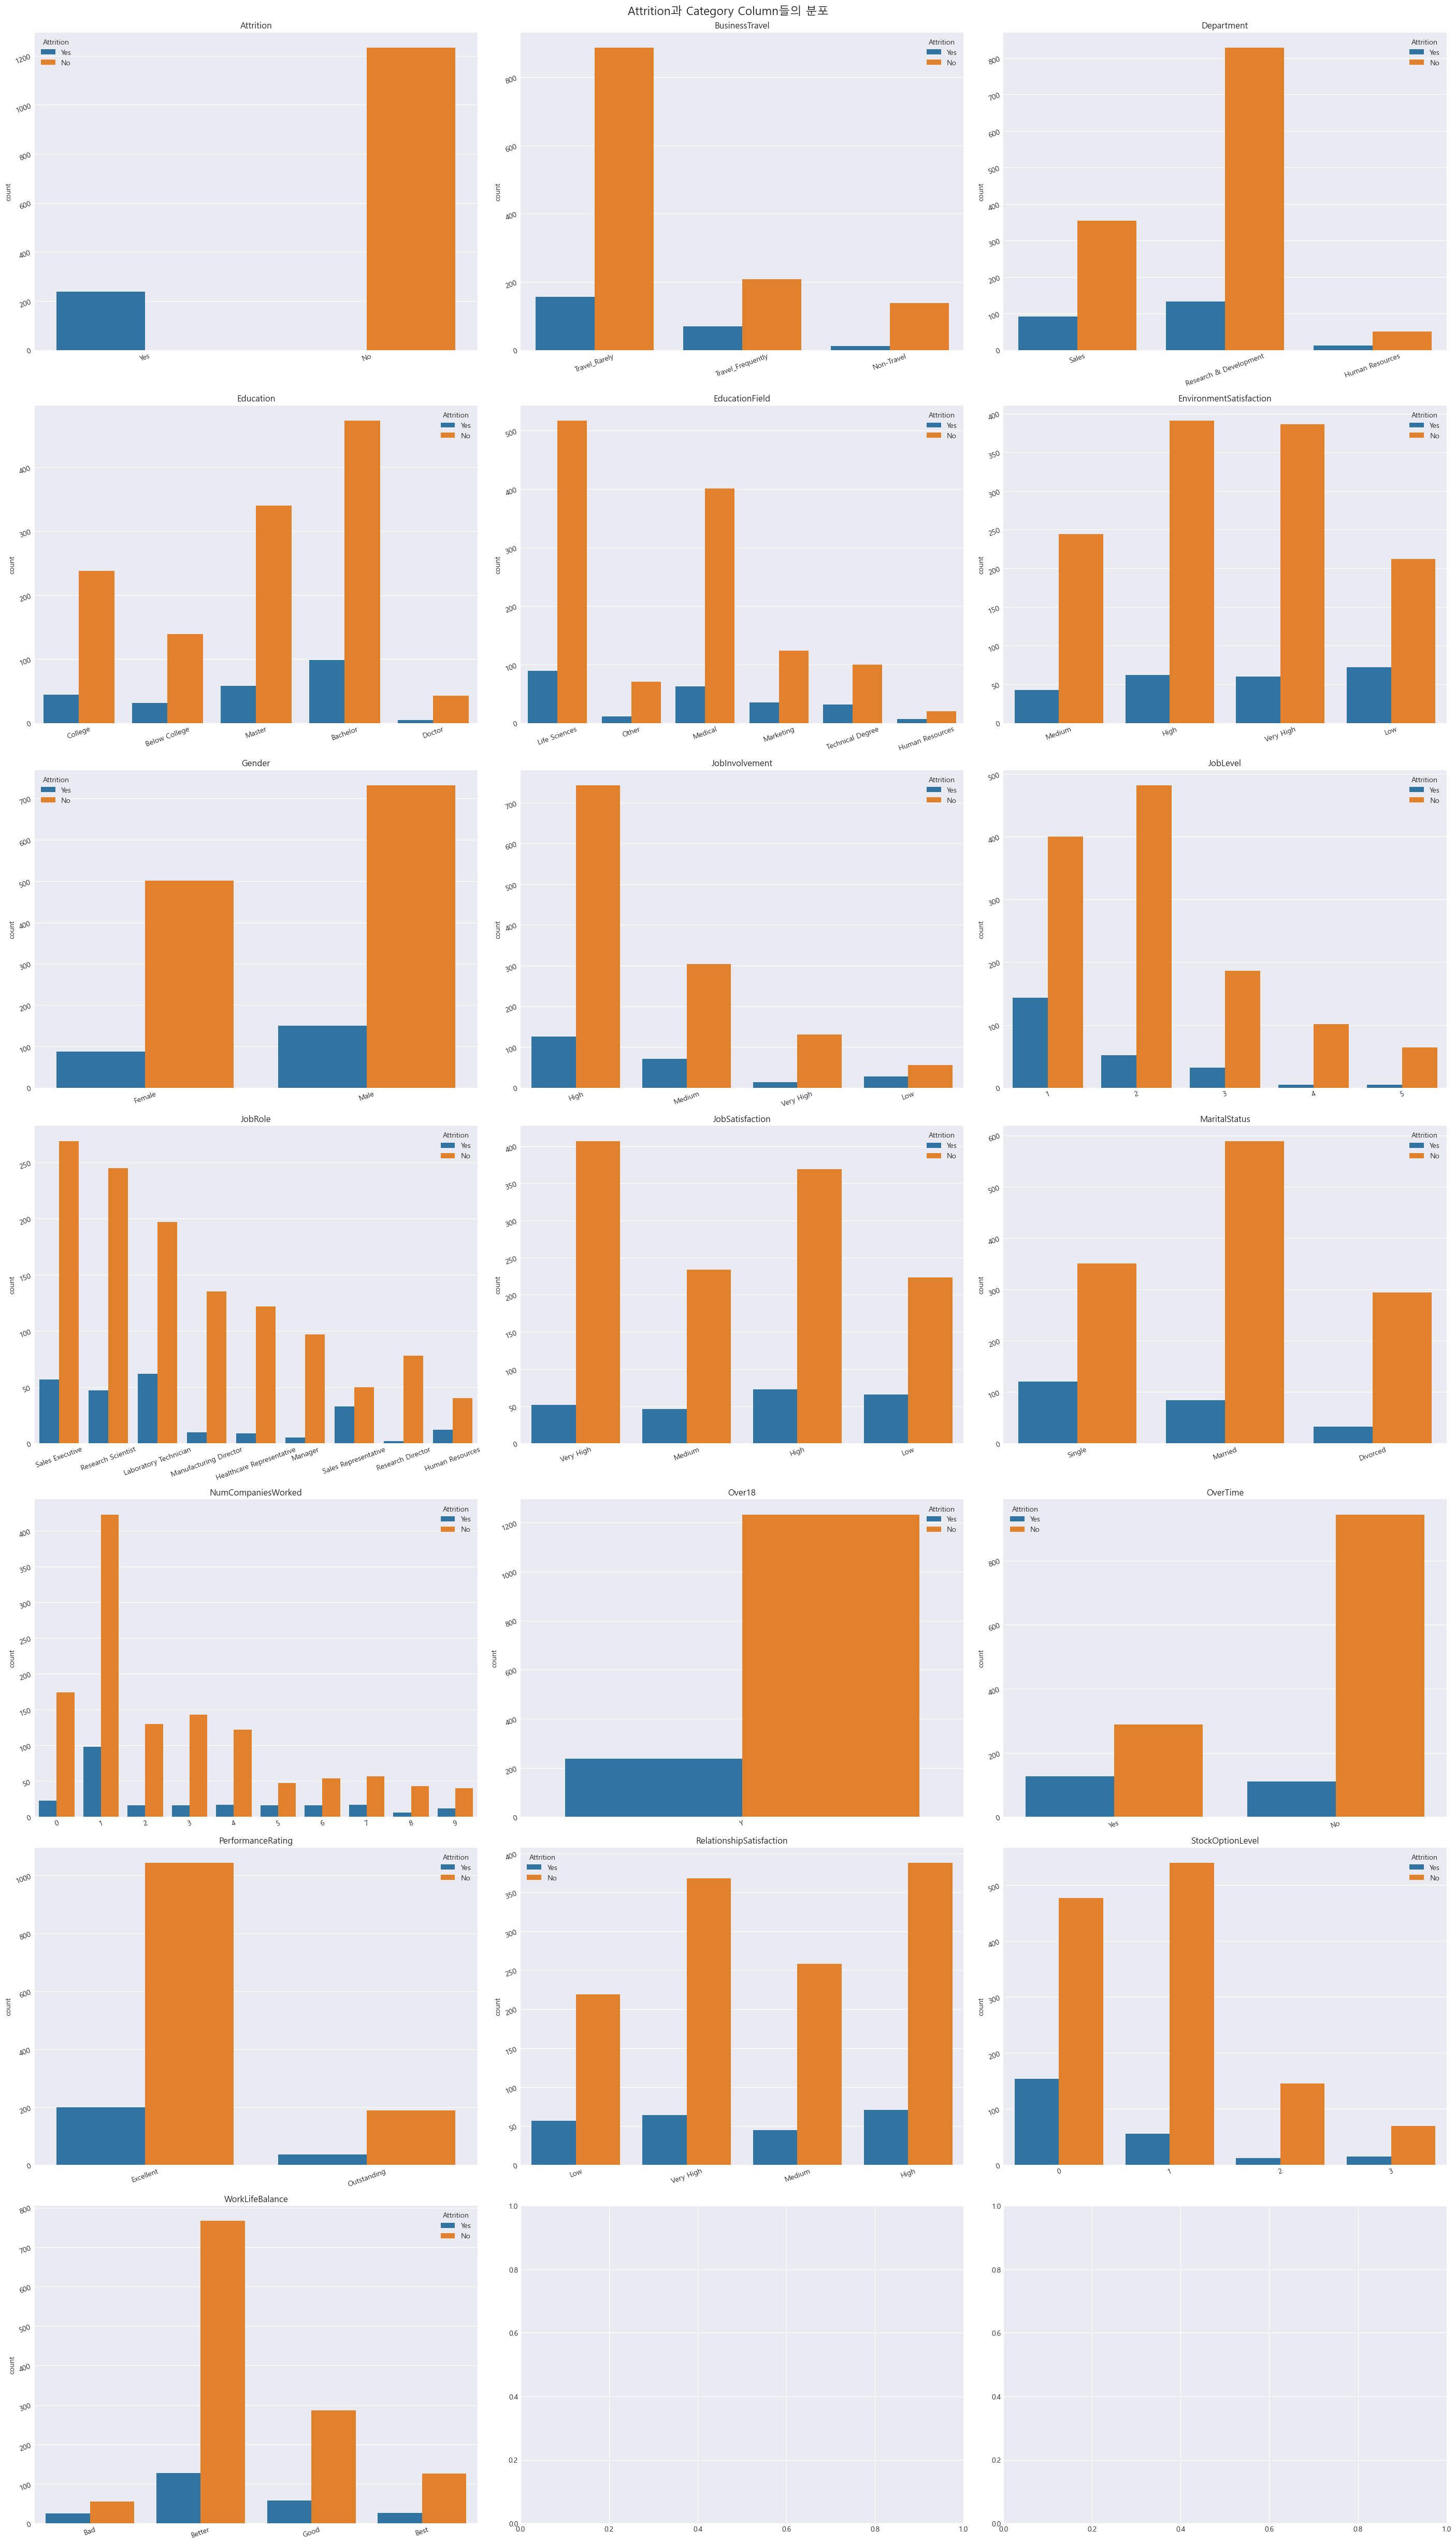

In [40]:
# Categorical한 변수들만 모아서 보기 (dtype이 Object)
cate_cols = [column for column in df.columns if df[column].dtype == object]   

fig, ax = plt.subplots(7, 3, figsize=(28, 49), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Attrition과 Category Column 간의 분포', fontsize=16)

for i in range(len(cate_cols)):
    sns.countplot(x=cate_cols[i], data=df,
                      hue='Attrition', ax=ax[i]).set(xlabel = None)
    ax[i].set(title = cate_cols[i])
    
    if df[cate_cols[1]].nunique() >= 3:
        ax[i].tick_params(labelrotation=20)
        
plt.show()

히스토그램을 보았을때, 근무환경 만족도, 스톡옵션의 유무(높고 낮음), 그리고 워라벨의 정도가 퇴사에 유의미한 영향을 줄것으로 보였다.

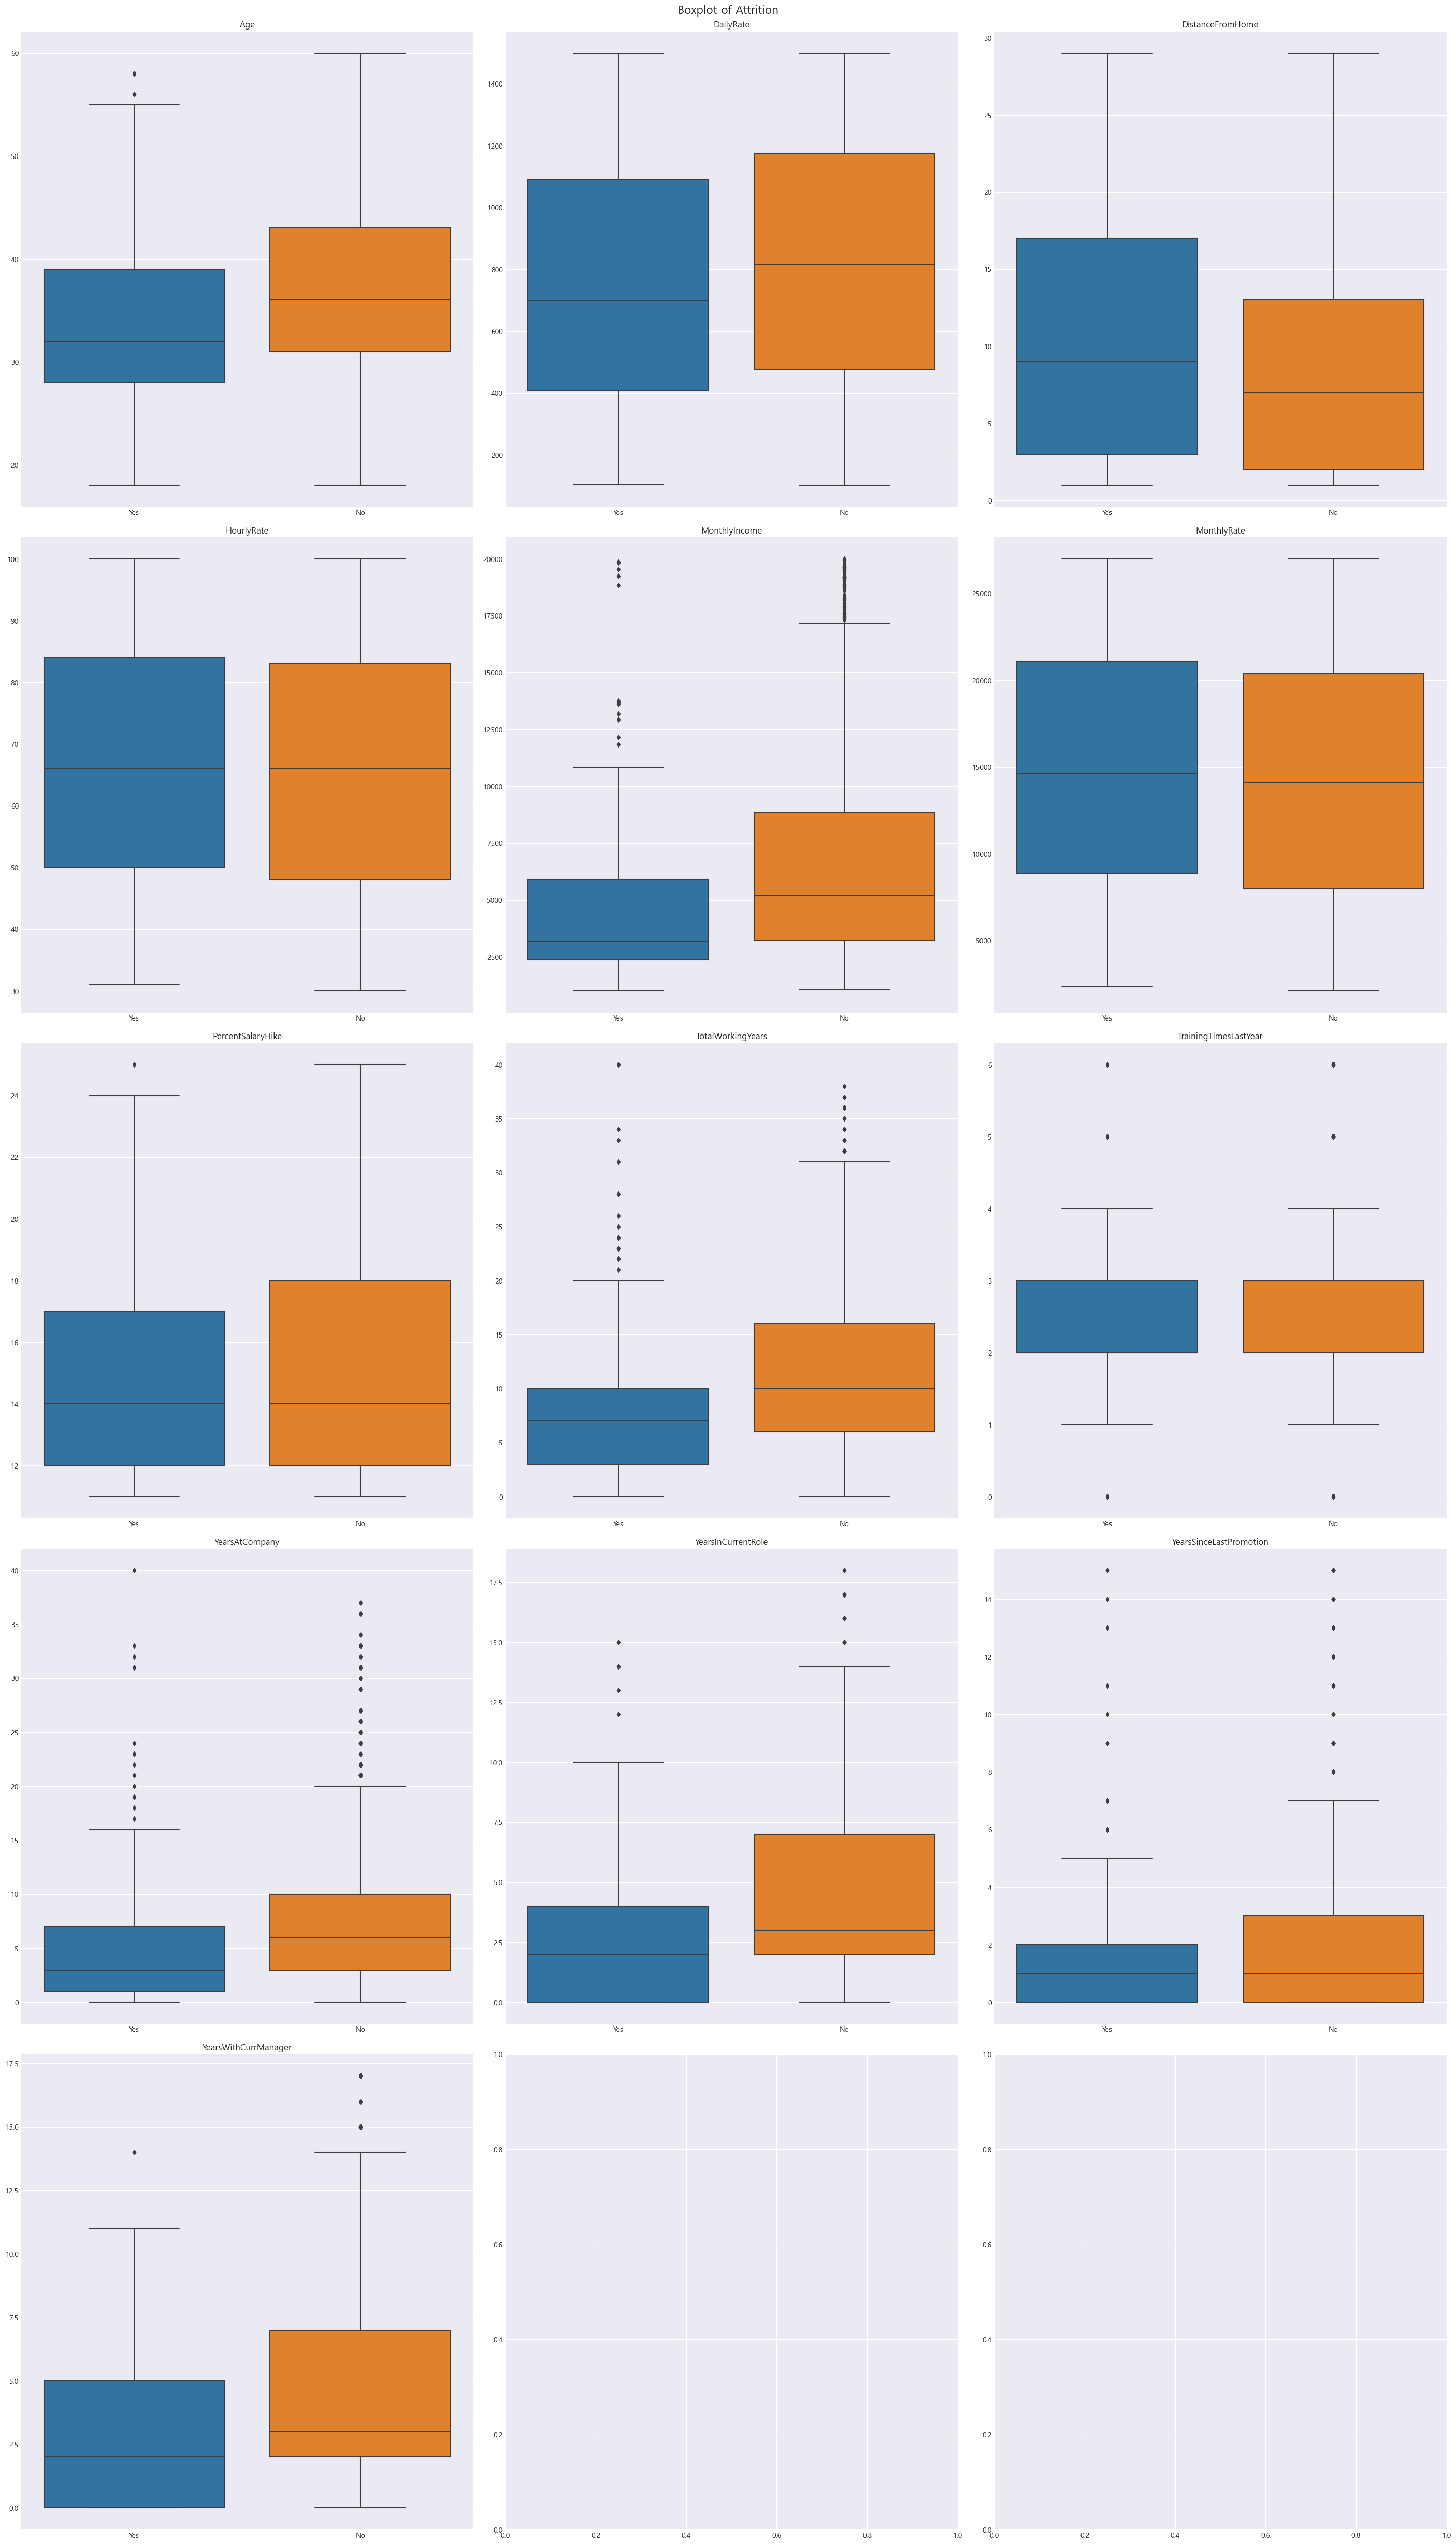

In [49]:
# Numeric한 변수들만 모아서 보기
cont_cols = [column for column in df.columns if df[column].dtype != object]        

fig, ax = plt.subplots(5, 3, figsize=(28, 49), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Boxplot of Attrition', fontsize=16)

for i in range(len(cont_cols)):
    ax[i].set(title = cont_cols[i])
    sns.boxplot(x=df['Attrition'], y = df[cont_cols[i]], ax=ax[i]).set(xlabel=None,  ylabel=None)
    
plt.show()

Box Plot을 보았을때, 월 급여, 회사와의 거리, 연봉 상승률에 따라 퇴사율이 유의미하게 달라지는 것으로 보였다.

## 수치형 변수 간 상관관계 파악

In [53]:
# 먼저 데이터간 상관계수를 구했다.
data_cp = df.copy()
data_cp = pd.get_dummies(data_cp, drop_first=True)
data_cp = data_cp[['Attrition_Yes'] + [column for column in data_cp.columns if column != 'Attrition_Yes']]

data_corr = data_cp.corr()

C:\Users\dksu4\AppData\Local\Temp\ipykernel_43648\2032057333.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data_cp = pd.get_dummies(data_cp, drop_first=True)
C:\Users\dksu4\AppData\Local\Temp\ipykernel_43648\2032057333.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data_cp = pd.get_dummies(data_cp, drop_first=True)
C:\Users\dksu4\AppData\Local\Temp\ipykernel_43648\2032057333.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data_cp = pd.get_dummies(data_cp, drop_first=True)


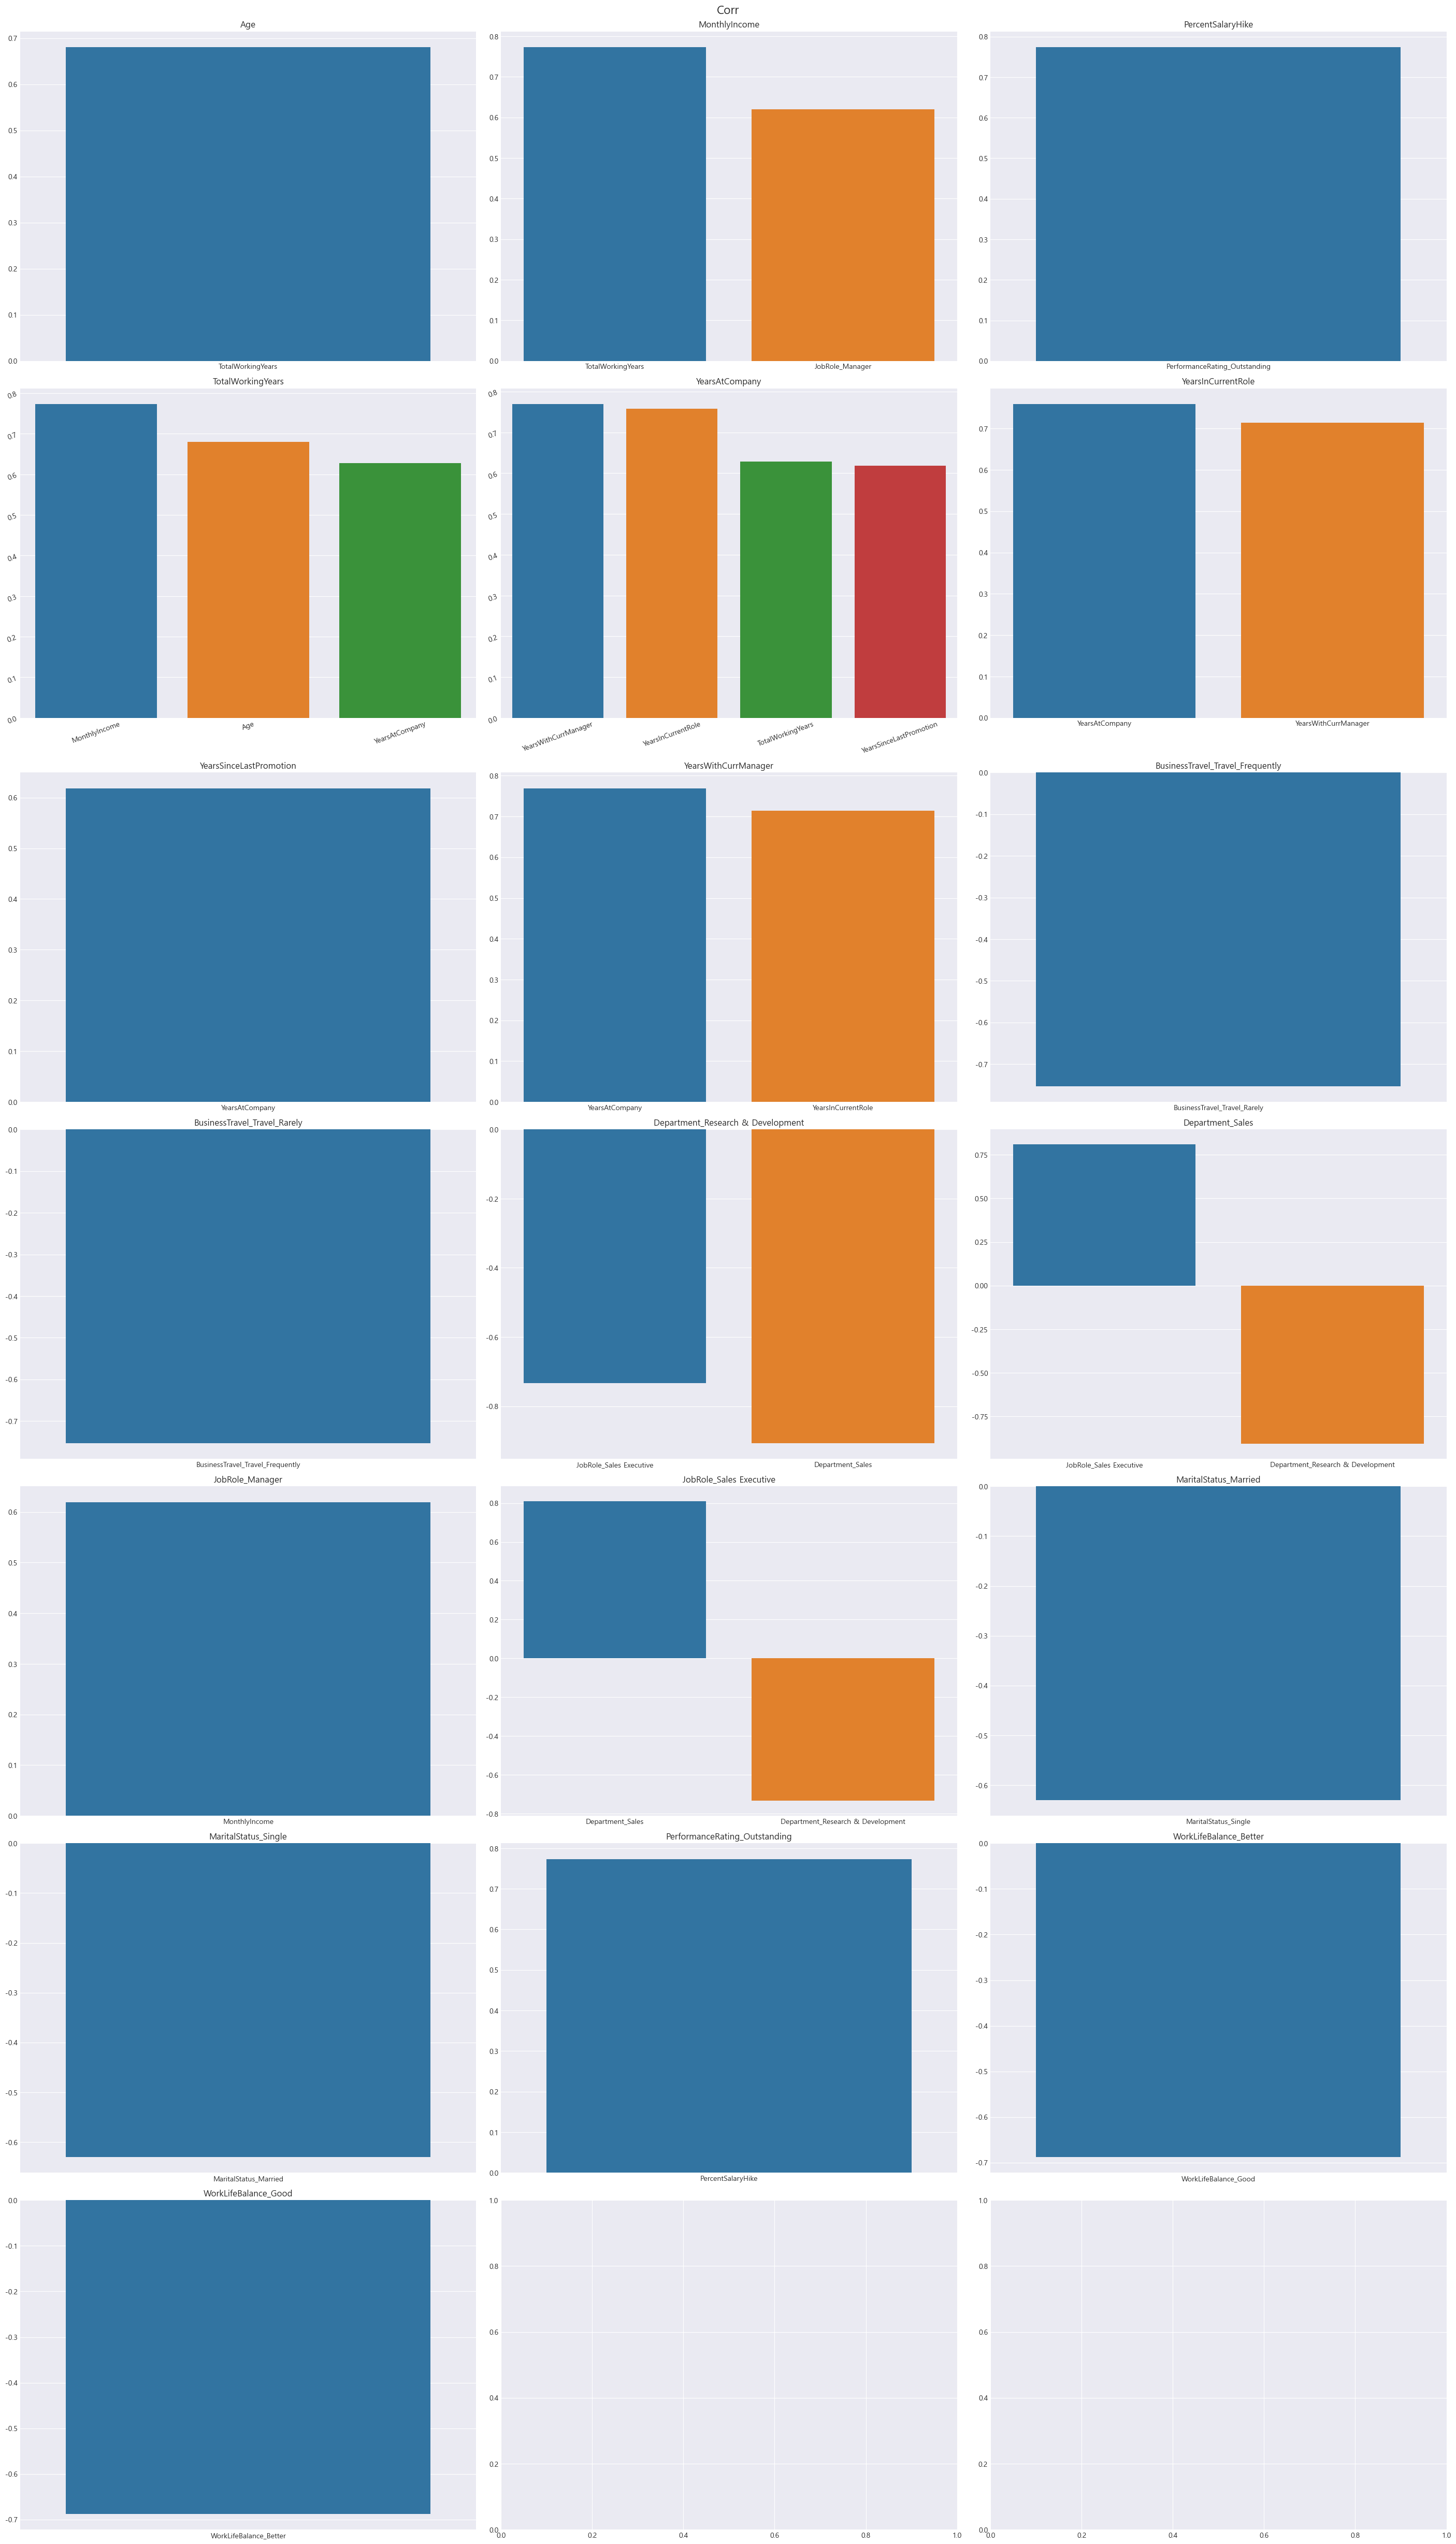

In [57]:
# 변수가 매우 많으므로, 일부 상관관계가 있는 것들만 기준을 두어서 Bar Plot의 형태로 뽑아내었다.
refined_data_corr = data_corr[(data_corr > 0.6) | (data_corr < -0.6)]

high_corr = []
for column in refined_data_corr:
    now_data = refined_data_corr[column].dropna()
    
    if len(now_data) == 1:
        continue
    high_corr.append([now_data.name, now_data.to_dict()])

fig, ax = plt.subplots(7,3, figsize = (28, 49), constrained_layout=True)
fig.suptitle('Corr', fontsize=16)
ax = ax.flatten()

for i, c in enumerate(high_corr):
    ordered_d = OrderedDict(sorted(high_corr[i][1].items(), key=lambda t:t[1], reverse=True))
    title = ordered_d.popitem(0)
    
    sns.barplot(x = list(ordered_d.keys()), y = list(ordered_d.values()), ax = ax[i])
    ax[i].set(title = title[0])
    
    if len(ordered_d.keys()) > 2:
        ax[i].tick_params(labelrotation=20)
        
plt.show()

corr 값이 높은 것(절댓값 0.6 이상)들만 보았을때, 나이, 월 급여, 경력, 관리자와의 관계에 대한 Column간의 상관계수가 높았음.

## 가설 확인 및 파생변수 생성
> * 가설 1. 근무 만족도가 안좋은 사람이 퇴사를 많이 할 것이다.
> * 가설 2. 워라벨이 좋지 않은 사람들이 퇴사를 많이 할 것이다.
> * 가설 3. 월 급여가 낮은 사람이 퇴사를 많이 할 것이다.
> * 가설 4. 회사와의 거리가 먼 사람이 퇴사를 많이 할 것이다.
> * 가설 5. 연봉 상승률이 낮은 사람이 퇴사를 많이 할 것이다.

In [67]:
# 반복적으로 사용될 Table 생성 함수를 미리 정의
def make_pivot(data, x, y, fn):
    # Value에 Age는 데이터 기준 열임.
    table = pd.pivot_table(data = data, values = 'Age', index = x, columns= y, aggfunc=fn)
    table['total'] = table['No'] + table['Yes']
    table['Attrition_rate'] = table['Yes'] / table['total'] * 100
    return table

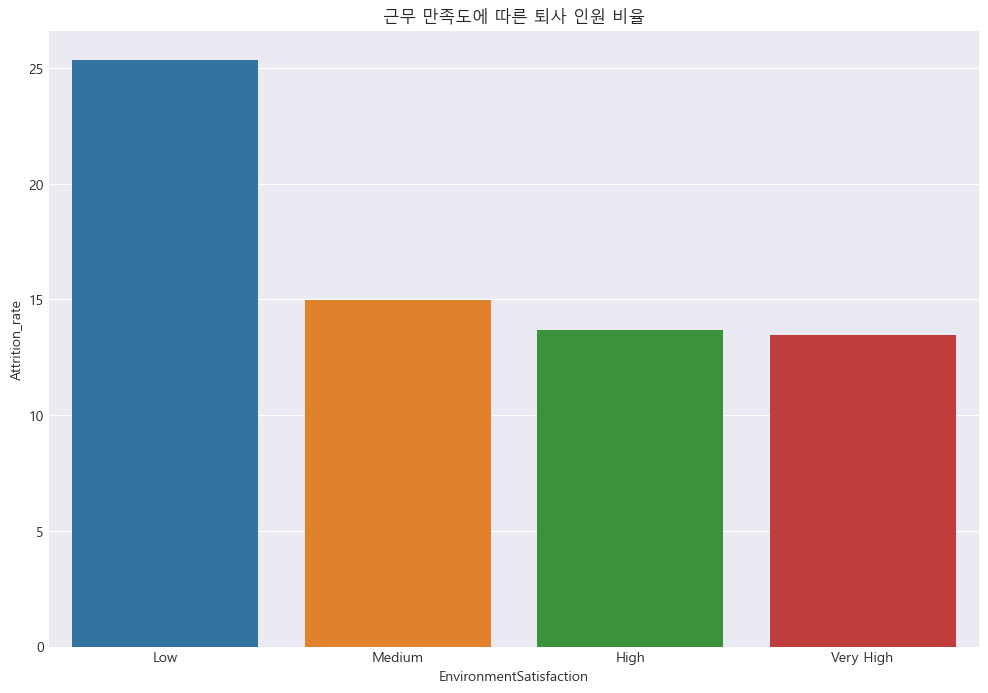

In [79]:
# 가설 1. 근무 만족도가 안좋은 사람이 퇴사를 많이 할 것이다.
rate = make_pivot(df, 'EnvironmentSatisfaction', 'Attrition', fn= len)

plt.figure(figsize = (12,8))
plt.title('근무 만족도에 따른 퇴사 인원 비율')
sns.barplot(x=rate.index, y=rate.Attrition_rate, order=['Low', 'Medium', 'High', 'Very High'])
plt.show()

회사에서 근무 만족도가 낮을수록, 퇴사자 비율이 더 높음을 알 수 있었다. 가장 낮은 Low의 경우 약 25%에 해당함.

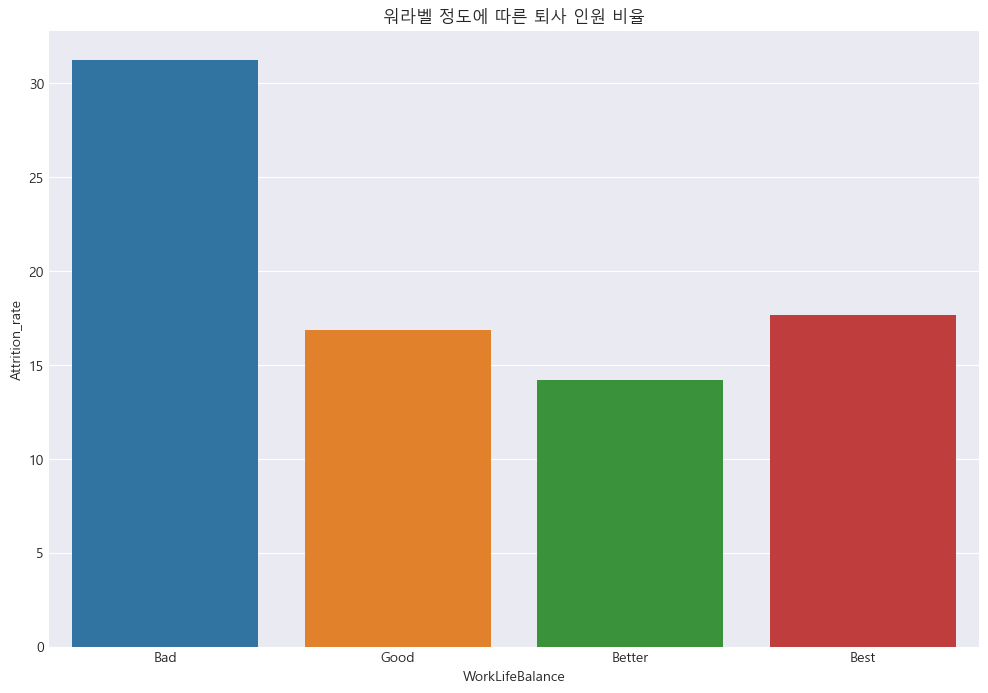

In [81]:
# 가설 2. 워라벨이 좋지 않은 사람들이 퇴사를 많이 할 것이다.
rate = make_pivot(df, 'WorkLifeBalance', 'Attrition', fn= len)

plt.figure(figsize = (12,8))
plt.title('워라벨 정도에 따른 퇴사 인원 비율')
sns.barplot(x=rate.index, y=rate.Attrition_rate, order=['Bad', 'Good', 'Better', 'Best'])
plt.show()

워라벨이 낮을수록 더 높은 퇴사 비율을 보일줄 알았으나, Best의 경우 두 번째로 높은 퇴사율을 기록하고 있음.
하지만 Bad가 약 30%의 비율로 가장 높은 퇴사 비율을 기록.

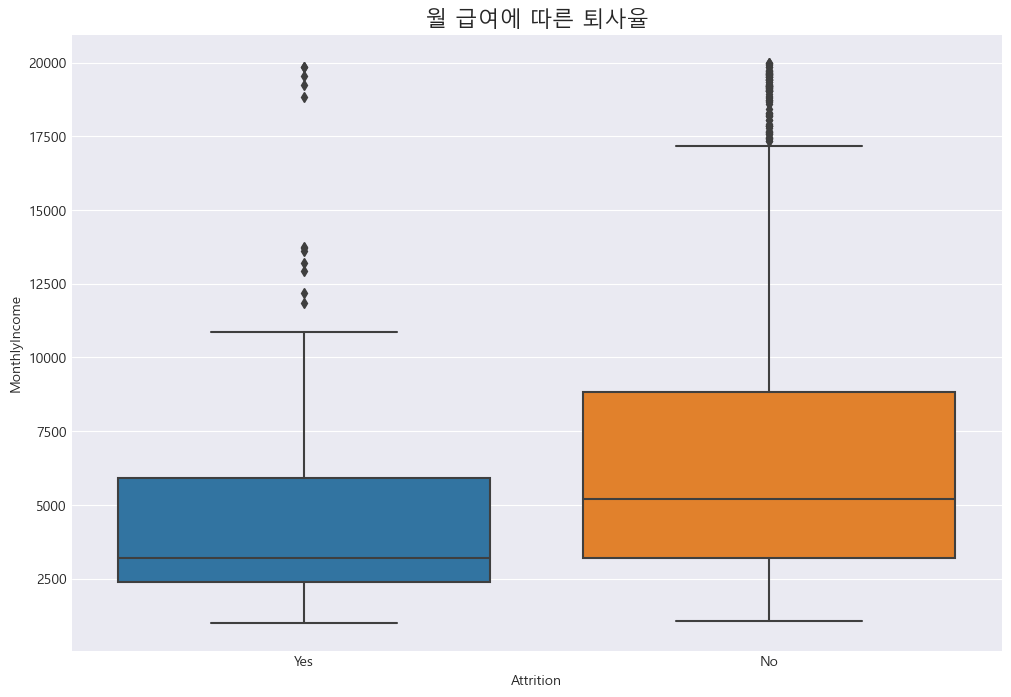

In [83]:
# 가설 3. 월 급여가 낮은 사람이 퇴사를 많이 할 것이다.
# 월 급여의 경우 시각화 도구로서 Box Plot이 적당하다고 생각했다.

plt.figure(figsize = (12,8))
plt.title('월 급여에 따른 퇴사율', fontsize=16)
# rate = make_pivot(df, 'MonthlyIncome', 'Attrition', fn=len)
# sns.barplot(x=rate.index, y=rate.Attrition_rate)

sns.boxplot(x = 'Attrition', y = 'MonthlyIncome', data = df)
plt.show()

박스 그래프를 보았을때, 퇴사한 사람들의 월 급여 평균이 더 낮고 분포도 더 좁은것으로 보아,
월 급여가 퇴사에 영향을 준다고 볼 수 있다.

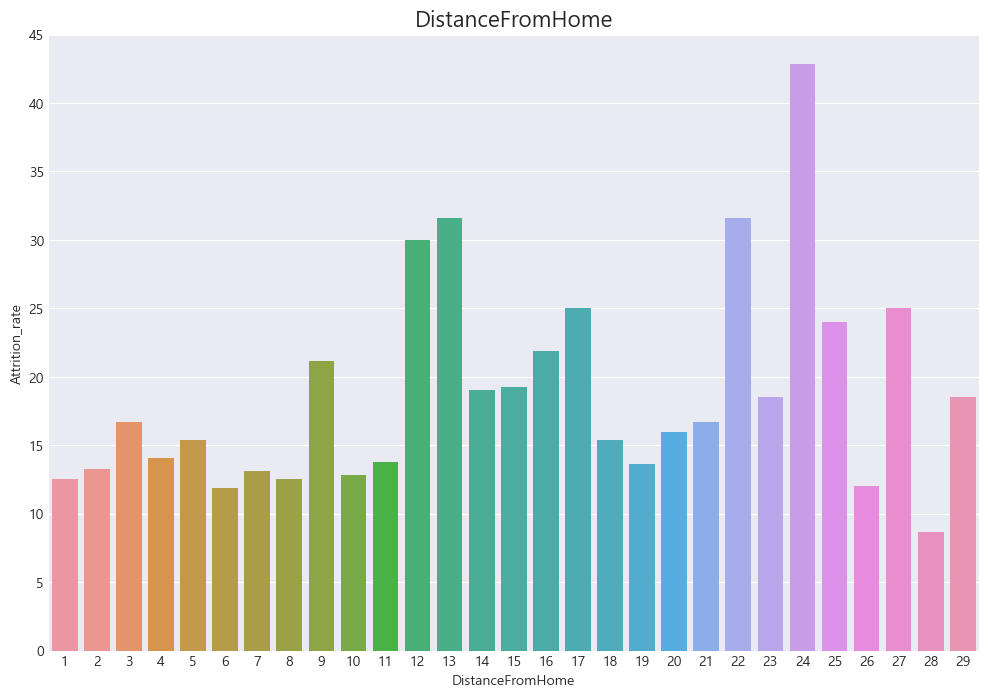

In [68]:
# 가설 4. 회사와의 거리가 먼 사람이 퇴사를 많이 할 것이다.
rate = make_pivot(df, 'DistanceFromHome', 'Attrition', fn=len)

plt.figure(figsize=(12,8))
plt.title('DistanceFromHome', fontsize=16)

# Seaborn의 Barplot을 사용.
sns.barplot(x=rate.index, y=rate.Attrition_rate)

plt.show()

회사와의 거리가 멀어질 수록, 더 많은 사람이 퇴사를 하는 경향을 보인다.   거리 24가 가장 큰 퇴사 비율을 차지함.

### 파생변수 정의
그래프 상에서 거리가 멀기에 퇴사 비율이 많아 보이는 22부터, 새로운 칼럼을 생성해도 될 듯함.

In [75]:
df['FarFromHome'] = np.where(df.DistanceFromHome >= 22, 1, 0)
df['FarFromHome'] = df['FarFromHome'].astype(object)

df['FarFromHome'].describe()

count     1470
unique       2
top          0
freq      1284
Name: FarFromHome, dtype: int64

In [ ]:
# 가설 5. 연봉 상승률이 낮은 사람이 퇴사를 많이 할 것이다.

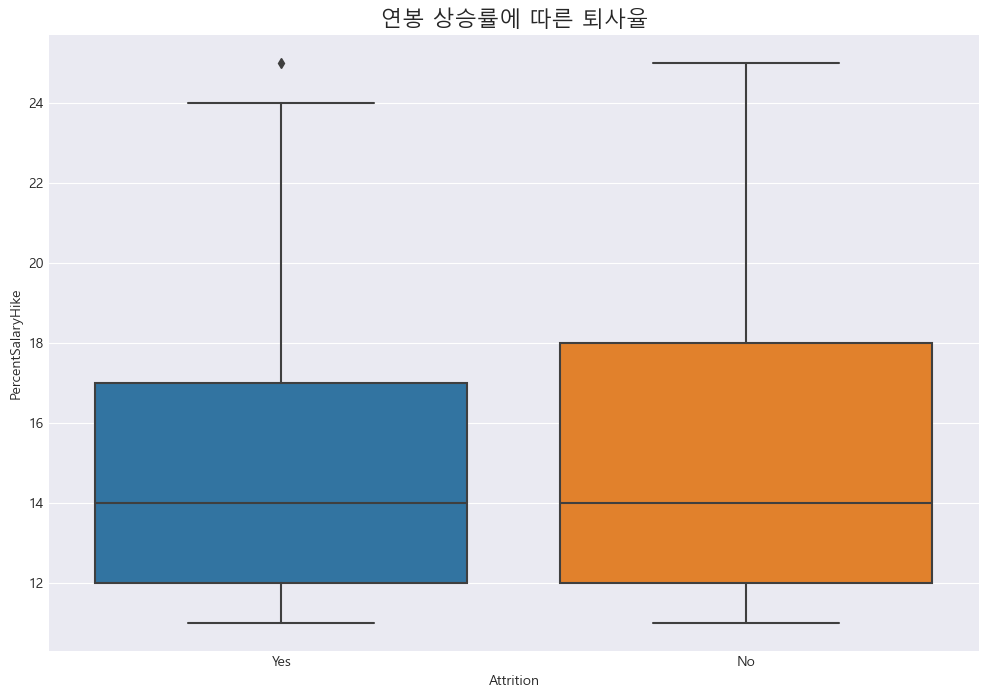

In [84]:
plt.figure(figsize = (12,8))
plt.title('연봉 상승률에 따른 퇴사율', fontsize=16)

sns.boxplot(x = 'Attrition', y = 'PercentSalaryHike', data = df)
plt.show()

결과적으로는 연봉 상승률이 낮은 사람들이 더 많이 퇴사 하는 것으로 보이나, 평균 연봉 상승률이 동일한것으로 보아 퇴사에 큰 영향을 주지 않는것으로 보인다.